In [1]:
#Load the libraries - Load them all here - not sprinkled throughout the notebook.
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SequentialFeatureSelector as SFS
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore') #ignore warnings

In [2]:
#load date 
df = pd.read_csv('../data/Cancer_Data.csv')

### **Perform EDA (Exploratory Data Analysis)**



In [3]:
#initial check of the data
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
catagorical_vars = []
for col in df.columns:
  if df[col].dtype == 'object':
    catagorical_vars.append(col)
print(catagorical_vars)

['diagnosis']


In [6]:
l_encoder = LabelEncoder()
for col in catagorical_vars:
  df[col] = l_encoder.fit_transform(df[col])

In [7]:
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,1,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,1,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,1,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [8]:
df.describe()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [9]:
print("Missing values in each column:\n", df.isnull().sum())

Missing values in each column:
 id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal


Feature: radius_mean
Kurtosis: 0.85
Skewness: 0.94


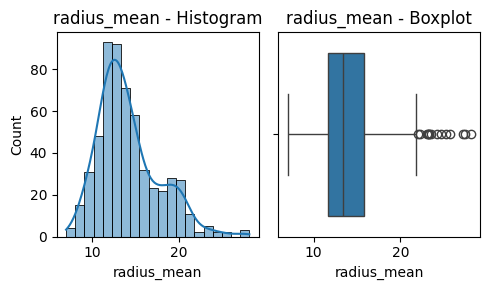


Feature: texture_mean
Kurtosis: 0.76
Skewness: 0.65


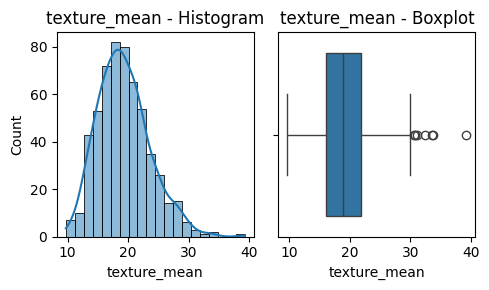


Feature: perimeter_mean
Kurtosis: 0.97
Skewness: 0.99


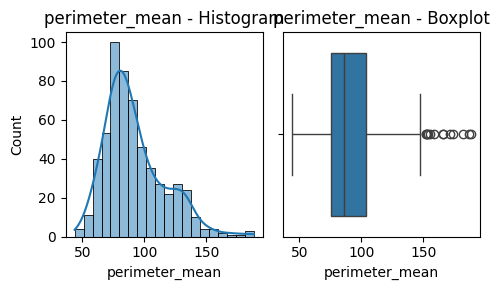


Feature: area_mean
Kurtosis: 3.65
Skewness: 1.65


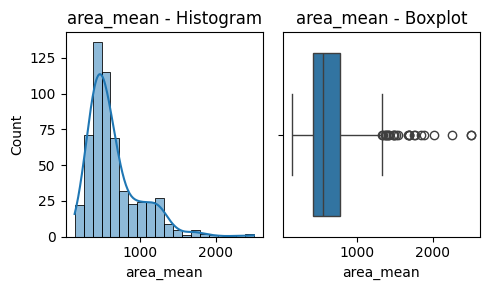


Feature: smoothness_mean
Kurtosis: 0.86
Skewness: 0.46


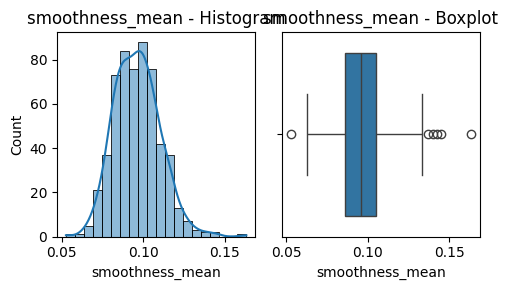


Feature: compactness_mean
Kurtosis: 1.65
Skewness: 1.19


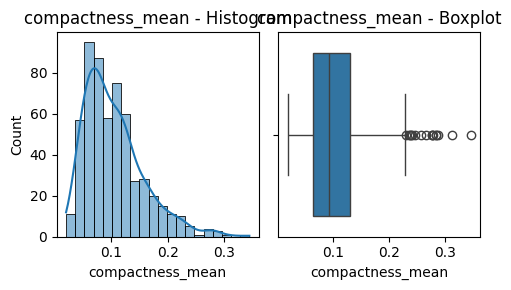


Feature: concavity_mean
Kurtosis: 2.00
Skewness: 1.40


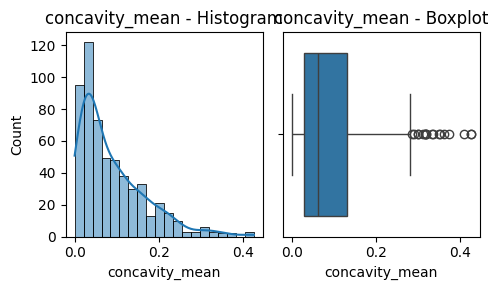


Feature: concave points_mean
Kurtosis: 1.07
Skewness: 1.17


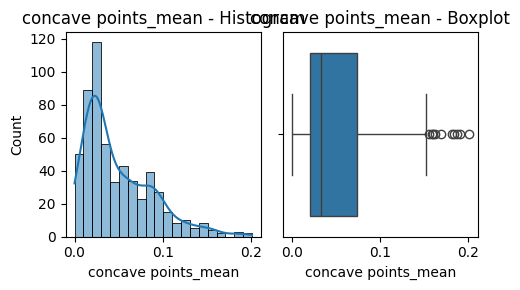


Feature: symmetry_mean
Kurtosis: 1.29
Skewness: 0.73


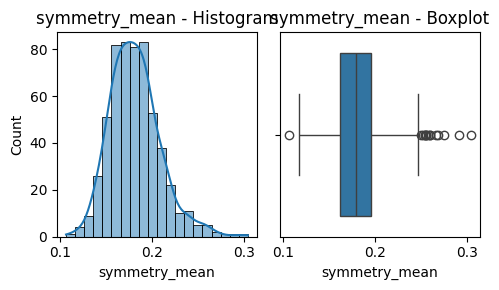


Feature: fractal_dimension_mean
Kurtosis: 3.01
Skewness: 1.30


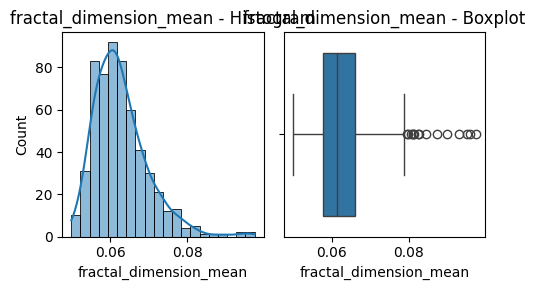


Feature: radius_se
Kurtosis: 17.69
Skewness: 3.09


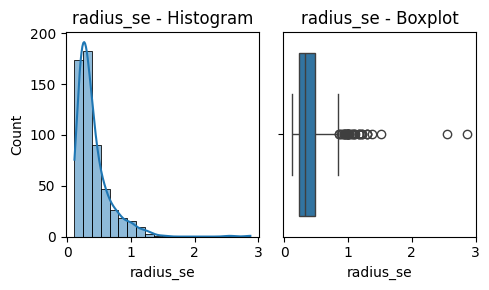


Feature: texture_se
Kurtosis: 5.35
Skewness: 1.65


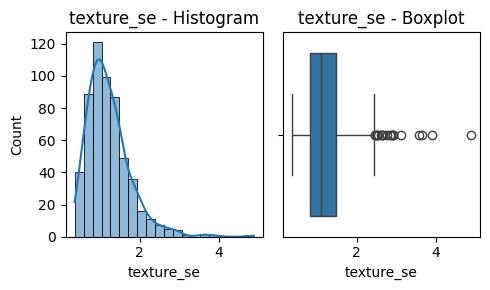


Feature: perimeter_se
Kurtosis: 21.40
Skewness: 3.44


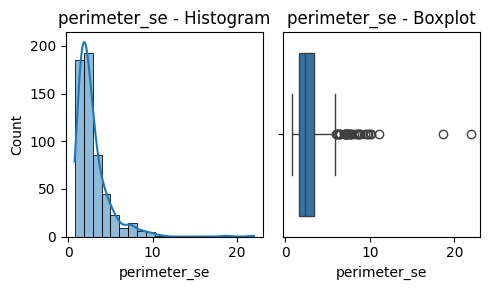


Feature: area_se
Kurtosis: 49.21
Skewness: 5.45


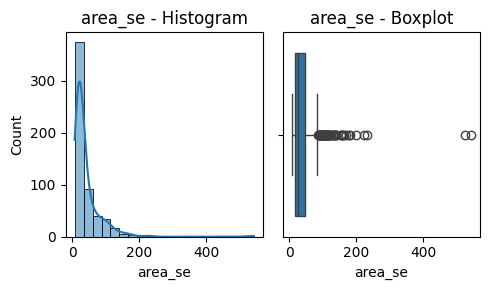


Feature: smoothness_se
Kurtosis: 10.47
Skewness: 2.31


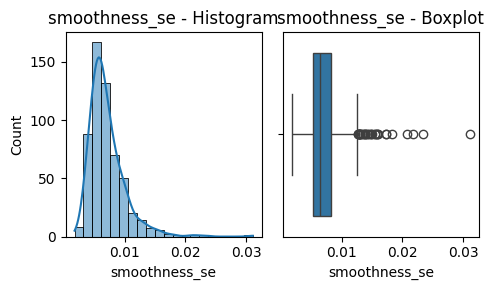


Feature: compactness_se
Kurtosis: 5.11
Skewness: 1.90


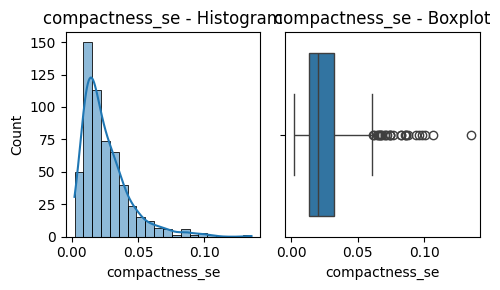


Feature: concavity_se
Kurtosis: 48.86
Skewness: 5.11


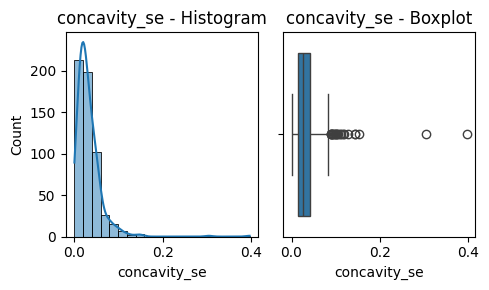


Feature: concave points_se
Kurtosis: 5.13
Skewness: 1.44


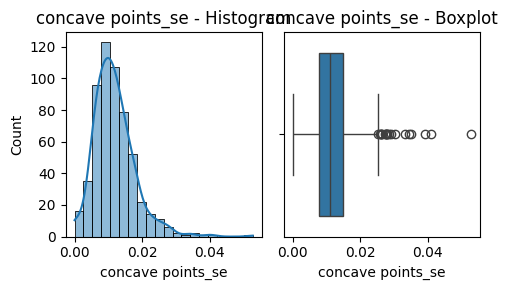


Feature: symmetry_se
Kurtosis: 7.90
Skewness: 2.20


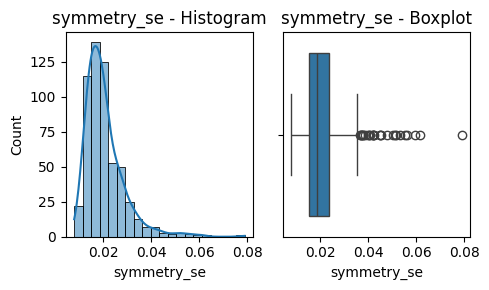


Feature: fractal_dimension_se
Kurtosis: 26.28
Skewness: 3.92


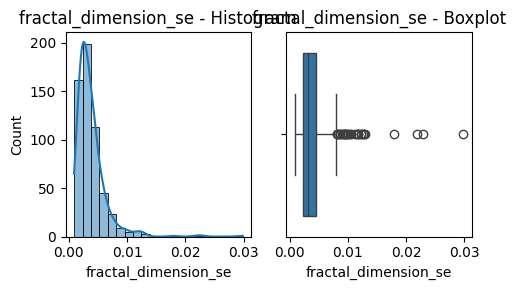


Feature: radius_worst
Kurtosis: 0.94
Skewness: 1.10


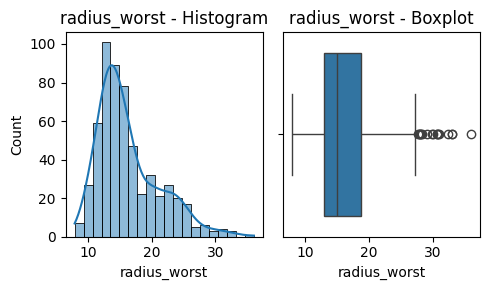


Feature: texture_worst
Kurtosis: 0.22
Skewness: 0.50


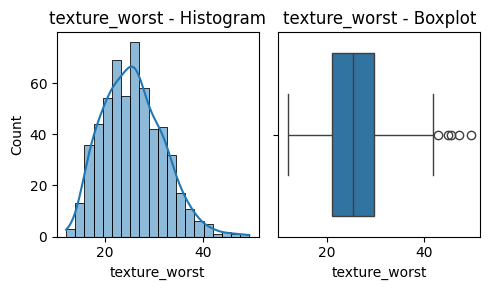


Feature: perimeter_worst
Kurtosis: 1.07
Skewness: 1.13


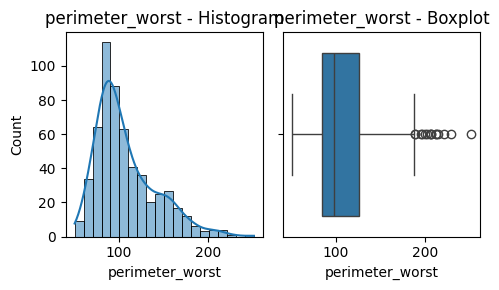


Feature: area_worst
Kurtosis: 4.40
Skewness: 1.86


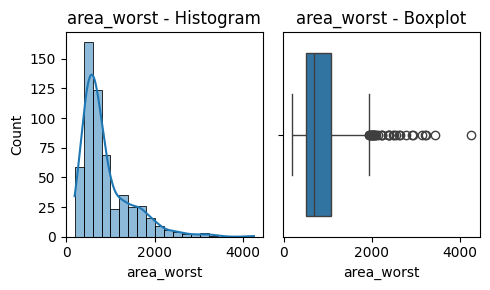


Feature: smoothness_worst
Kurtosis: 0.52
Skewness: 0.42


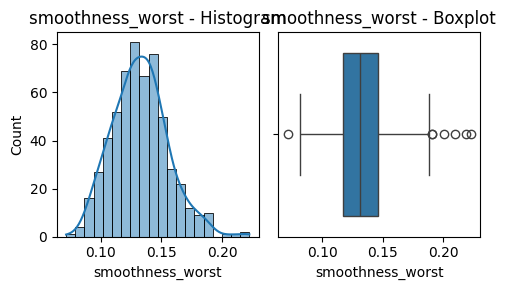


Feature: compactness_worst
Kurtosis: 3.04
Skewness: 1.47


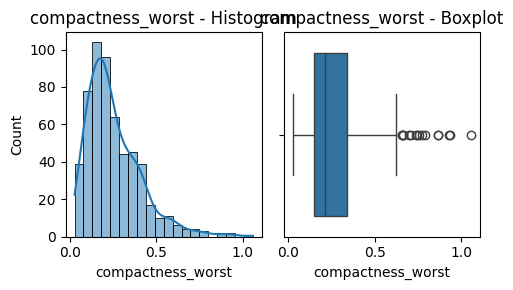


Feature: concavity_worst
Kurtosis: 1.62
Skewness: 1.15


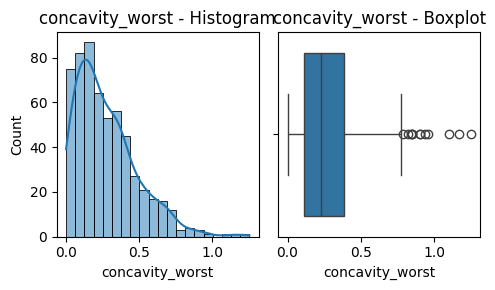


Feature: concave points_worst
Kurtosis: -0.54
Skewness: 0.49


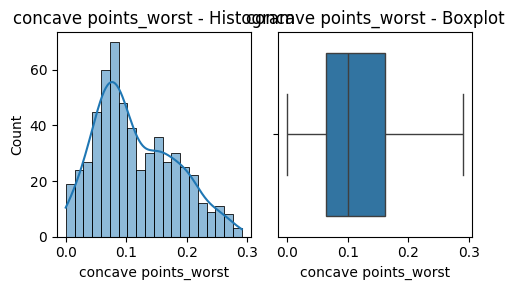


Feature: symmetry_worst
Kurtosis: 4.44
Skewness: 1.43


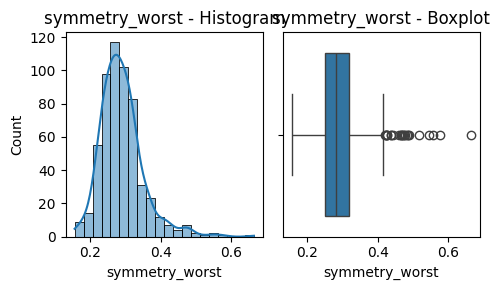


Feature: fractal_dimension_worst
Kurtosis: 5.24
Skewness: 1.66


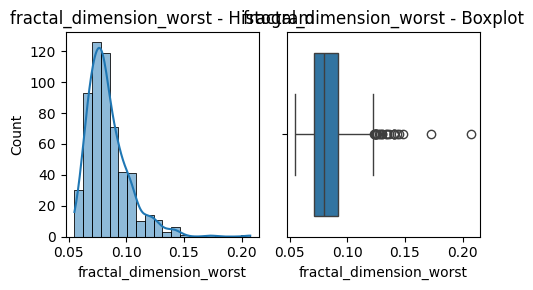


Features with possible outliers (Kurtosis > 3): ['area_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'area_worst', 'compactness_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [10]:
# Initialize an empty list to store features with possible outliers
outlier_features = []

# Visualize the distribution of numerical features and calculate kurtosis/skewness
for feature in df.columns:
    if feature not in ['diagnosis', 'id', 'Unnamed: 32']:  # Exclude target and irrelevant columns
        plt.figure(figsize=(5, 3))
        
        # Plot histogram
        plt.subplot(1, 2, 1)
        sns.histplot(df[feature], kde=True, bins=20)
        plt.title(f'{feature} - Histogram')
        
        # Plot boxplot to detect outliers
        plt.subplot(1, 2, 2)
        sns.boxplot(x=df[feature])  # Use 'x=' to correctly pass the feature
        plt.title(f'{feature} - Boxplot')
        
        # Calculate kurtosis and skewness
        kurt = df[feature].kurtosis()
        skew = df[feature].skew()
        print(f"\nFeature: {feature}")
        print(f"Kurtosis: {kurt:.2f}")
        print(f"Skewness: {skew:.2f}")
        
        # Check if kurtosis is greater than 3 (indicating potential outliers)
        if kurt > 3:
            outlier_features.append(feature)
        
        # Show plots
        plt.tight_layout()
        plt.show()

# After looping through all features, print the features with possible outliers
print("\nFeatures with possible outliers (Kurtosis > 3):", outlier_features)


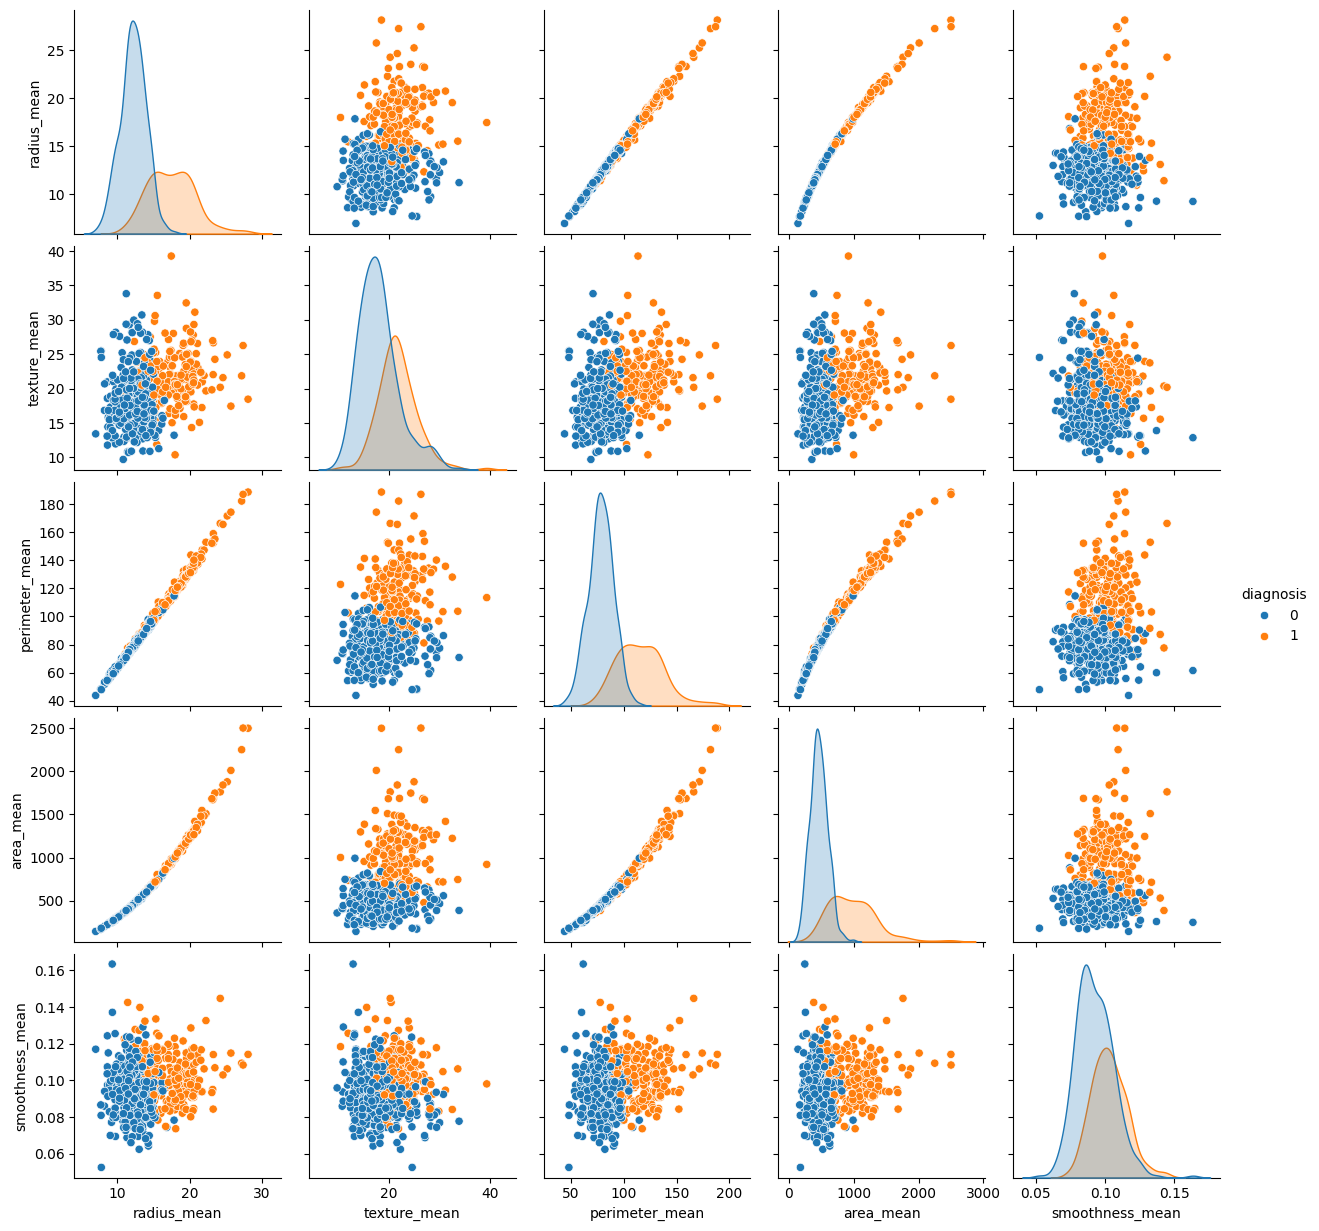

In [11]:
sns.pairplot(df, hue='diagnosis', vars=['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean'])

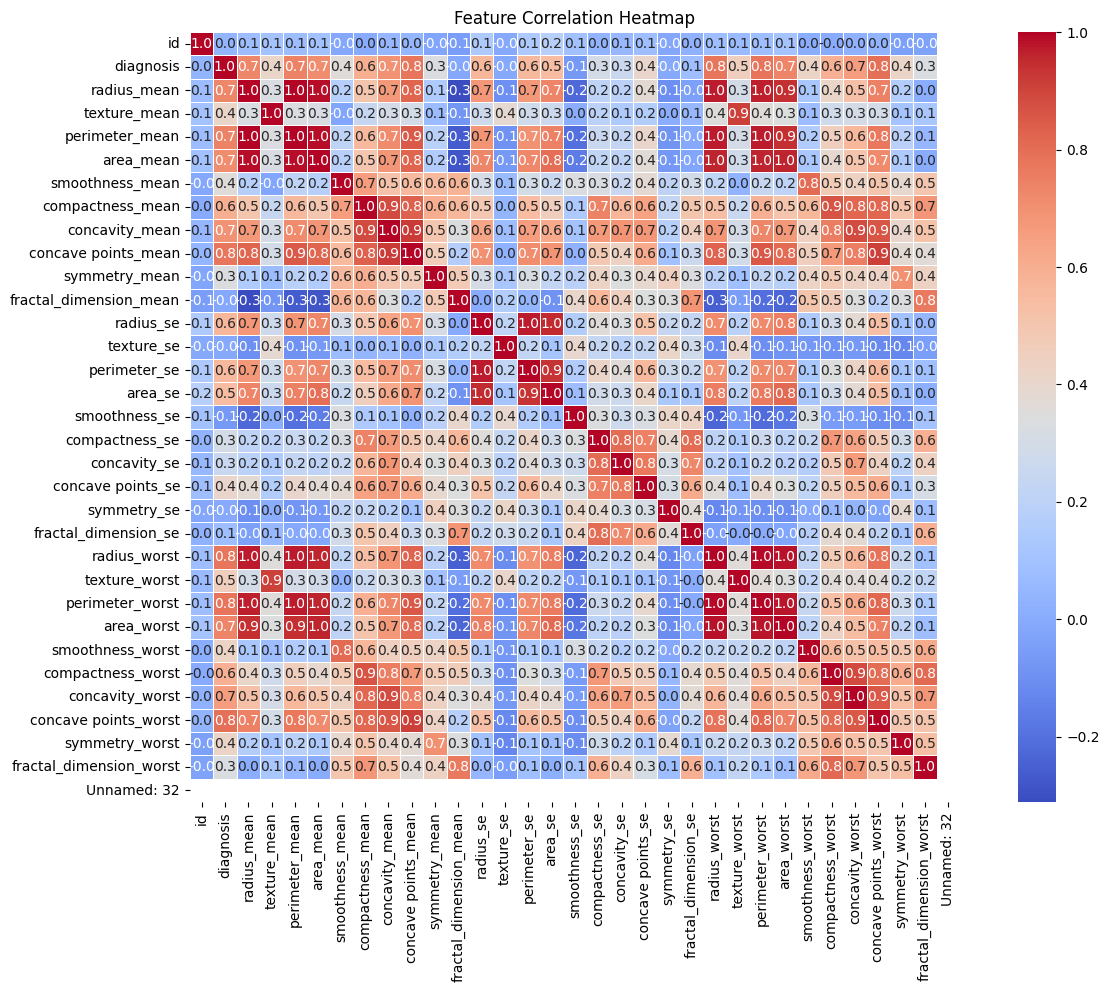

In [12]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.1f', cbar=True, square=True, linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

The below feature pairs are highly positively correlated and may carry similar information, which could be important for dimensionality reduction techniques like PCA 
1. radius_mean and perimeter_mean: Correlation = 0.99
2. radius_mean and area_mean: Correlation = 0.99
3. perimeter_mean and area_mean: Correlation = 0.99
4. radius_worst and perimeter_worst: Correlation = 0.99
5. radius_worst and area_worst: Correlation = 0.98
6. perimeter_worst and area_worst: Correlation = 0.99
7. concave points_mean and concavity_mean: Correlation = 0.88
8. concave points_worst and concavity_worst: Correlation = 0.86

diagnosis
0    357
1    212
Name: count, dtype: int64


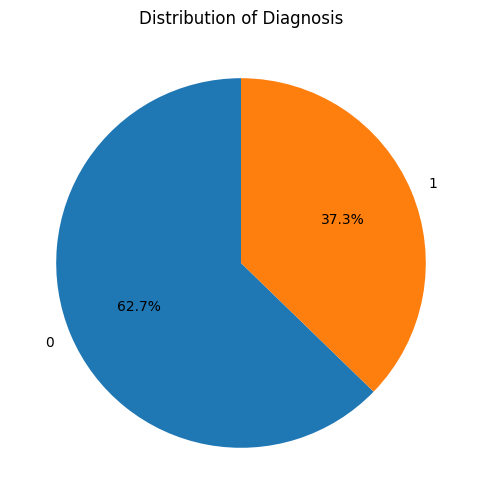

In [13]:
diagnosis_counts = df['diagnosis'].value_counts()
print(diagnosis_counts)
plt.figure(figsize=(8, 6))
plt.pie(diagnosis_counts, labels=diagnosis_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Diagnosis')
plt.show()

### **DATA PREPARATION**


In [14]:
#Dropping the columns or features that were identifed in understanding the data
df.drop(['Unnamed: 32', 'id'], axis=1, inplace=True)

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
X_vif = df.drop('diagnosis', axis=1)
vif_data = pd.DataFrame()
vif_data['feature'] = X_vif.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print(vif_data)

                    feature           VIF
0               radius_mean  63306.172036
1              texture_mean    251.047108
2            perimeter_mean  58123.586079
3                 area_mean   1287.262339
4           smoothness_mean    393.398166
5          compactness_mean    200.980354
6            concavity_mean    157.855046
7       concave points_mean    154.241268
8             symmetry_mean    184.426558
9    fractal_dimension_mean    629.679874
10                radius_se    236.665738
11               texture_se     24.675367
12             perimeter_se    211.396334
13                  area_se     72.466468
14            smoothness_se     26.170243
15           compactness_se     44.919651
16             concavity_se     33.244099
17        concave points_se     53.698656
18              symmetry_se     37.176452
19     fractal_dimension_se     27.532631
20             radius_worst   9674.742602
21            texture_worst    343.004387
22          perimeter_worst   4487

In [16]:
# Display VIF values sorted in descending order
vif_data_sorted = vif_data.sort_values(by='VIF', ascending=False)
print(vif_data_sorted)

                    feature           VIF
0               radius_mean  63306.172036
2            perimeter_mean  58123.586079
20             radius_worst   9674.742602
22          perimeter_worst   4487.781270
3                 area_mean   1287.262339
23               area_worst   1138.759252
9    fractal_dimension_mean    629.679874
29  fractal_dimension_worst    423.396723
4           smoothness_mean    393.398166
24         smoothness_worst    375.597155
21            texture_worst    343.004387
1              texture_mean    251.047108
10                radius_se    236.665738
28           symmetry_worst    218.919805
12             perimeter_se    211.396334
5          compactness_mean    200.980354
8             symmetry_mean    184.426558
6            concavity_mean    157.855046
7       concave points_mean    154.241268
27     concave points_worst    148.673180
25        compactness_worst    132.884276
26          concavity_worst     86.310362
13                  area_se     72

### **Divide data into testing and training sets**

In [17]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### **MODELING**

In [ ]:
# Define the models
rf = RandomForestClassifier(random_state=42)
knn = KNeighborsClassifier()
lr = LogisticRegression(random_state=42)


# Hyperparameter grids for GridSearchCV
rf_params = {'n_estimators': [100, 200], 'max_depth': [10, 20, None]}  # Tuning number of trees and tree depth
knn_params = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}  # Tuning number of neighbors and weights
lr_params = {'C': [0.01, 0.1, 1, 10], 'solver': ['liblinear', 'saga']}  # Tuning regularization strength and solver

# Perform GridSearchCV for each model to find the best hyperparameters
rf_grid = GridSearchCV(rf, rf_params, cv=5)  # 5-fold cross-validation for Random Forest
knn_grid = GridSearchCV(knn, knn_params, cv=5)  # 5-fold cross-validation for KNN
lr_grid = GridSearchCV(lr, lr_params, cv=5)  # 5-fold cross-validation for Logistic Regression

# Fit the models to the training data
rf_grid.fit(X_train, y_train)
knn_grid.fit(X_train, y_train)
lr_grid.fit(X_train, y_train)

# Extract the best model (after hyperparameter tuning) for each algorithm
best_rf = rf_grid.best_estimator_
best_knn = knn_grid.best_estimator_
best_lr = lr_grid.best_estimator_


In [20]:

# Show best parameters for Random Forest Classifier
print("Best parameters for Random Forest Classifier:", rf_grid.best_params_)
# Show best parameters for KNN Classifier
print("Best parameters for KNN Classifier:", knn_grid.best_params_)
# Show best parameters for Logistic Regression Classifier
print("Best parameters for Logistic Regression Classifier:", lr_grid.best_params_)

Best parameters for Random Forest Classifier: {'max_depth': 10, 'n_estimators': 100}
Best parameters for KNN Classifier: {'n_neighbors': 3, 'weights': 'distance'}
Best parameters for Logistic Regression Classifier: {'C': 10, 'solver': 'liblinear'}


In [21]:
knn_grid

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7],
                         'weights': ['uniform', 'distance']})

In [22]:
rf_grid

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [10, 20, None],
                         'n_estimators': [100, 200]})

In [23]:
lr_grid

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'solver': ['liblinear', 'saga']})

### **Model Evaluation**

In [25]:
# Use different evaluation metrics like accuracy, precision, recall, F1 score, and AUC (Area Under the Curve) to assess model performance.

def evaluate_model(model, X_test, y_test):
    # Predict the labels for the test set
    y_pred = model.predict(X_test)
    
    # Calculate the evaluation metrics
    acc = accuracy_score(y_test, y_pred)  # Accuracy
    precision = precision_score(y_test, y_pred)  # Precision
    recall = recall_score(y_test, y_pred)  # Recall
    f1 = f1_score(y_test, y_pred)  # F1 Score
    auc = roc_auc_score(y_test, y_pred)  # AUC score (ROC curve)
    
    # Return all metrics in a dictionary
    return {'Accuracy': acc, 'Precision': precision, 'Recall': recall, 'F1 Score': f1, 'AUC': auc}

# Evaluate the best models on the test set
rf_metrics = evaluate_model(best_rf, X_test, y_test)
knn_metrics = evaluate_model(best_knn, X_test, y_test)
lr_metrics = evaluate_model(best_lr, X_test, y_test)

metrics_df = pd.DataFrame([knn_metrics, rf_metrics, lr_metrics], index=['KNN', 'Random Forest', 'Logistic Regression'])

print(metrics_df)


                     Accuracy  Precision    Recall  F1 Score       AUC
KNN                  0.921053   1.000000  0.785714  0.880000  0.892857
Random Forest        0.973684   1.000000  0.928571  0.962963  0.964286
Logistic Regression  0.938596   0.948718  0.880952  0.913580  0.926587


In [26]:
from sklearn.model_selection import cross_val_score
def evaluate_with_cross_validation(model, X, y, cv=5):
    """
    Perform cross-validation and return the average score across all folds.
    """
    accuracy = cross_val_score(model, X, y, cv=cv, scoring='accuracy').mean()
    precision = cross_val_score(model, X, y, cv=cv, scoring='precision').mean()
    recall = cross_val_score(model, X, y, cv=cv, scoring='recall').mean()
    f1 = cross_val_score(model, X, y, cv=cv, scoring='f1').mean()
    auc = cross_val_score(model, X, y, cv=cv, scoring='roc_auc').mean()
    
    return {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'AUC': auc
    }

# Cross-validation for each model
rf_metrics_cv = evaluate_with_cross_validation(best_rf, X_train, y_train)
knn_metrics_cv = evaluate_with_cross_validation(best_knn, X_train, y_train)
lr_metrics_cv = evaluate_with_cross_validation(best_lr, X_train, y_train)

# Store the results in a DataFrame for easy comparison
cv_metrics_df = pd.DataFrame({
    'KNN': knn_metrics_cv,
    'Random Forest': rf_metrics_cv,
    'Logistic Regression': lr_metrics_cv
})

print(cv_metrics_df)

                KNN  Random Forest  Logistic Regression
Accuracy   0.925275       0.962637             0.960440
Precision  0.930332       0.953840             0.964171
Recall     0.864706       0.947059             0.929412
F1 Score   0.895913       0.950094             0.946166
AUC        0.950413       0.989474             0.990918


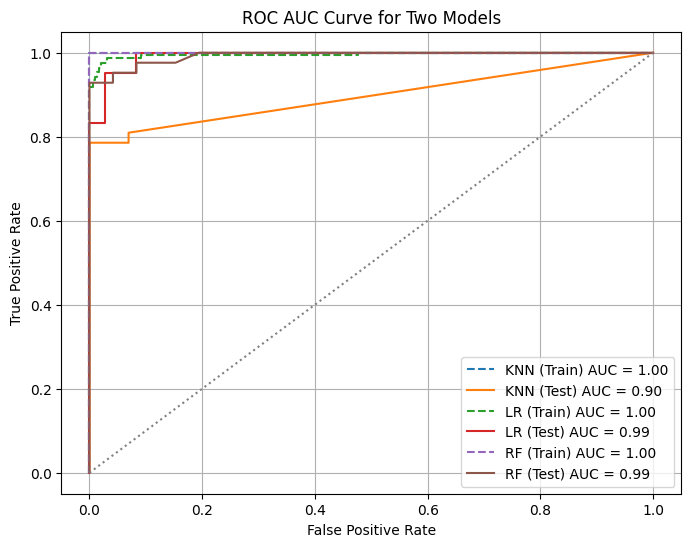

In [27]:
# Get predicted probabilities
y_train_prob1 = best_knn.predict_proba(X_train)[:, 1]
y_test_prob1 = best_knn.predict_proba(X_test)[:, 1]
y_train_prob2 = best_lr.predict_proba(X_train)[:, 1]
y_test_prob2 = best_lr.predict_proba(X_test)[:, 1]
y_train_prob3 = best_rf.predict_proba(X_train)[:, 1]
y_test_prob3 = best_rf.predict_proba(X_test)[:, 1]

# Compute ROC curves
fpr_train1, tpr_train1, _ = roc_curve(y_train, y_train_prob1)
fpr_test1, tpr_test1, _ = roc_curve(y_test, y_test_prob1)

fpr_train2, tpr_train2, _ = roc_curve(y_train, y_train_prob2)
fpr_test2, tpr_test2, _ = roc_curve(y_test, y_test_prob2)

fpr_train3, tpr_train3, _ = roc_curve(y_train, y_train_prob3)
fpr_test3, tpr_test3, _ = roc_curve(y_test, y_test_prob3)

# Compute AUC scores
auc_train1 = auc(fpr_train1, tpr_train1)
auc_test1 = auc(fpr_test1, tpr_test1)

auc_train2 = auc(fpr_train2, tpr_train2)
auc_test2 = auc(fpr_test2, tpr_test2)

auc_train3 = auc(fpr_train3, tpr_train3)
auc_test3 = auc(fpr_test3, tpr_test3)

# Plot ROC Curves
plt.figure(figsize=(8, 6))

# Model 1
plt.plot(fpr_train1, tpr_train1, linestyle="--", label=f"KNN (Train) AUC = {auc_train1:.2f}")
plt.plot(fpr_test1, tpr_test1, linestyle="-", label=f"KNN (Test) AUC = {auc_test1:.2f}")

# Model 2
plt.plot(fpr_train2, tpr_train2, linestyle="--", label=f"LR (Train) AUC = {auc_train2:.2f}")
plt.plot(fpr_test2, tpr_test2, linestyle="-", label=f"LR (Test) AUC = {auc_test2:.2f}")

# Model 3
plt.plot(fpr_train3, tpr_train3, linestyle="--", label=f"RF (Train) AUC = {auc_train3:.2f}")
plt.plot(fpr_test3, tpr_test3, linestyle="-", label=f"RF (Test) AUC = {auc_test3:.2f}")

# Random classifier line
plt.plot([0, 1], [0, 1], color="grey", linestyle=":")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC AUC Curve for Two Models")
plt.legend()
plt.grid()
plt.show()


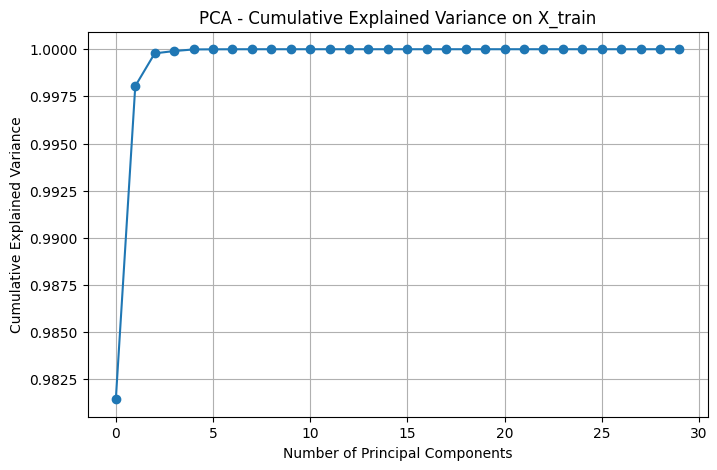

In [28]:
# Apply PCA to X_train and plot explained variance ratio
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Cumulative Explained Variance on X_train')
plt.grid(True)
plt.show()

In [29]:
# Reduce dimensionality to 4 principal components using PCA
pca_4 = PCA(n_components=4)
X_train_pca4 = pca_4.fit_transform(X_train)
X_test_pca4 = pca_4.transform(X_test)

print("Explained variance ratio for 4 components:", pca_4.explained_variance_ratio_)
print("Cumulative explained variance:", pca_4.explained_variance_ratio_.cumsum())

Explained variance ratio for 4 components: [9.81445704e-01 1.65993326e-02 1.73546664e-03 1.23075419e-04]
Cumulative explained variance: [0.9814457  0.99804504 0.9997805  0.99990358]


In [30]:
# Define the models
rf = RandomForestClassifier(random_state=42)
knn = KNeighborsClassifier()
lr = LogisticRegression(random_state=42)


# Hyperparameter grids for GridSearchCV
rf_params = {'n_estimators': [100, 200], 'max_depth': [10, 20, None]}  # Tuning number of trees and tree depth
knn_params = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}  # Tuning number of neighbors and weights
lr_params = {'C': [0.01, 0.1, 1, 10], 'solver': ['liblinear', 'saga']}  # Tuning regularization strength and solver

# Perform GridSearchCV for each model to find the best hyperparameters
rf_grid = GridSearchCV(rf, rf_params, cv=5)  # 5-fold cross-validation for Random Forest
knn_grid = GridSearchCV(knn, knn_params, cv=5)  # 5-fold cross-validation for KNN
lr_grid = GridSearchCV(lr, lr_params, cv=5)  # 5-fold cross-validation for Logistic Regression

# Fit the models to the training data
rf_grid.fit(X_train_pca4, y_train)
knn_grid.fit(X_train_pca4, y_train)
lr_grid.fit(X_train_pca4, y_train)

# Extract the best model (after hyperparameter tuning) for each algorithm
best_rf = rf_grid.best_estimator_
best_knn = knn_grid.best_estimator_
best_lr = lr_grid.best_estimator_

In [31]:

# Show best parameters for Random Forest Classifier
print("Best parameters for Random Forest Classifier:", rf_grid.best_params_)
# Show best parameters for KNN Classifier
print("Best parameters for KNN Classifier:", knn_grid.best_params_)
# Show best parameters for Logistic Regression Classifier
print("Best parameters for Logistic Regression Classifier:", lr_grid.best_params_)

Best parameters for Random Forest Classifier: {'max_depth': 10, 'n_estimators': 100}
Best parameters for KNN Classifier: {'n_neighbors': 3, 'weights': 'distance'}
Best parameters for Logistic Regression Classifier: {'C': 0.01, 'solver': 'liblinear'}


In [32]:
# Use different evaluation metrics like accuracy, precision, recall, F1 score, and AUC (Area Under the Curve) to assess model performance.

def evaluate_model(model, X_test_pca4, y_test):
    # Predict the labels for the test set
    y_pred = model.predict(X_test_pca4)
    
    # Calculate the evaluation metrics
    acc = accuracy_score(y_test, y_pred)  # Accuracy
    precision = precision_score(y_test, y_pred)  # Precision
    recall = recall_score(y_test, y_pred)  # Recall
    f1 = f1_score(y_test, y_pred)  # F1 Score
    auc = roc_auc_score(y_test, y_pred)  # AUC score (ROC curve)
    
    # Return all metrics in a dictionary
    return {'Accuracy': acc, 'Precision': precision, 'Recall': recall, 'F1 Score': f1, 'AUC': auc}

# Evaluate the best models on the test set
rf_metrics = evaluate_model(best_rf, X_test_pca4, y_test)
knn_metrics = evaluate_model(best_knn, X_test_pca4, y_test)
lr_metrics = evaluate_model(best_lr, X_test_pca4, y_test)

metrics_df = pd.DataFrame([knn_metrics, rf_metrics, lr_metrics], index=['KNN', 'Random Forest', 'Logistic Regression'])

print(metrics_df)

                     Accuracy  Precision    Recall  F1 Score       AUC
KNN                  0.921053   1.000000  0.785714  0.880000  0.892857
Random Forest        0.956140   1.000000  0.880952  0.936709  0.940476
Logistic Regression  0.956140   0.974359  0.904762  0.938272  0.945437


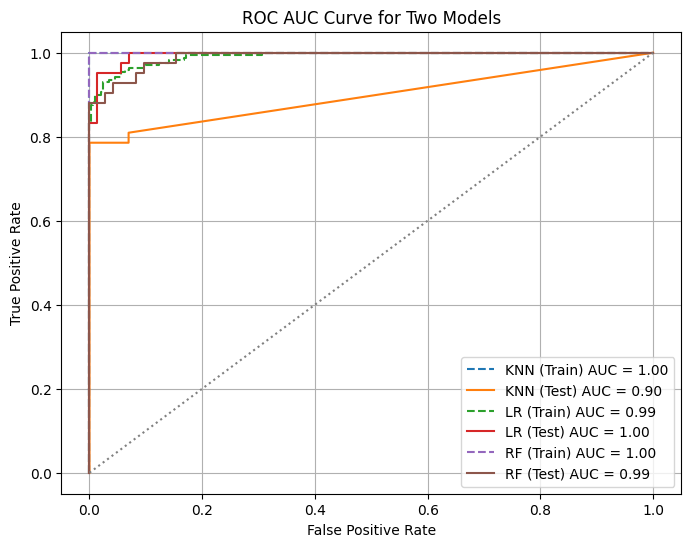

In [33]:
# Get predicted probabilities
y_train_prob1 = best_knn.predict_proba(X_train_pca4)[:, 1]
y_test_prob1 = best_knn.predict_proba(X_test_pca4)[:, 1]
y_train_prob2 = best_lr.predict_proba(X_train_pca4)[:, 1]
y_test_prob2 = best_lr.predict_proba(X_test_pca4)[:, 1]
y_train_prob3 = best_rf.predict_proba(X_train_pca4)[:, 1]
y_test_prob3 = best_rf.predict_proba(X_test_pca4)[:, 1]

# Compute ROC curves
fpr_train1, tpr_train1, _ = roc_curve(y_train, y_train_prob1)
fpr_test1, tpr_test1, _ = roc_curve(y_test, y_test_prob1)

fpr_train2, tpr_train2, _ = roc_curve(y_train, y_train_prob2)
fpr_test2, tpr_test2, _ = roc_curve(y_test, y_test_prob2)

fpr_train3, tpr_train3, _ = roc_curve(y_train, y_train_prob3)
fpr_test3, tpr_test3, _ = roc_curve(y_test, y_test_prob3)

# Compute AUC scores
auc_train1 = auc(fpr_train1, tpr_train1)
auc_test1 = auc(fpr_test1, tpr_test1)

auc_train2 = auc(fpr_train2, tpr_train2)
auc_test2 = auc(fpr_test2, tpr_test2)

auc_train3 = auc(fpr_train3, tpr_train3)
auc_test3 = auc(fpr_test3, tpr_test3)

# Plot ROC Curves
plt.figure(figsize=(8, 6))

# Model 1
plt.plot(fpr_train1, tpr_train1, linestyle="--", label=f"KNN (Train) AUC = {auc_train1:.2f}")
plt.plot(fpr_test1, tpr_test1, linestyle="-", label=f"KNN (Test) AUC = {auc_test1:.2f}")

# Model 2
plt.plot(fpr_train2, tpr_train2, linestyle="--", label=f"LR (Train) AUC = {auc_train2:.2f}")
plt.plot(fpr_test2, tpr_test2, linestyle="-", label=f"LR (Test) AUC = {auc_test2:.2f}")

# Model 3
plt.plot(fpr_train3, tpr_train3, linestyle="--", label=f"RF (Train) AUC = {auc_train3:.2f}")
plt.plot(fpr_test3, tpr_test3, linestyle="-", label=f"RF (Test) AUC = {auc_test3:.2f}")

# Random classifier line
plt.plot([0, 1], [0, 1], color="grey", linestyle=":")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC AUC Curve for Two Models")
plt.legend()
plt.grid()
plt.show()


Confusion Matrix (Random Forest, Test Set):
 [[72  0]
 [ 5 37]]


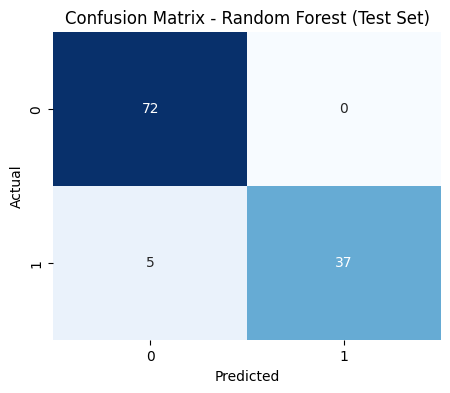

In [34]:
# Compute and display the confusion matrix for the test set using the best Random Forest model
y_pred_rf = best_rf.predict(X_test_pca4)
cm = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix (Random Forest, Test Set):\n", cm)

# Optionally, plot the confusion matrix as a heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest (Test Set)')
plt.show()

Confusion Matrix (Logistic Regression, Test Set):
 [[71  1]
 [ 4 38]]


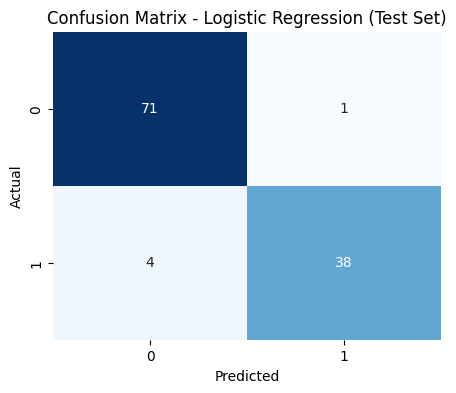

In [35]:
# Compute and display the confusion matrix for the test set using the best Logistic Regression model
y_pred_lr = best_lr.predict(X_test_pca4)
cm_lr = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix (Logistic Regression, Test Set):\n", cm_lr)

# Optionally, plot the confusion matrix as a heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression (Test Set)')
plt.show()

Confusion Matrix (KNN, Test Set):
 [[72  0]
 [ 9 33]]


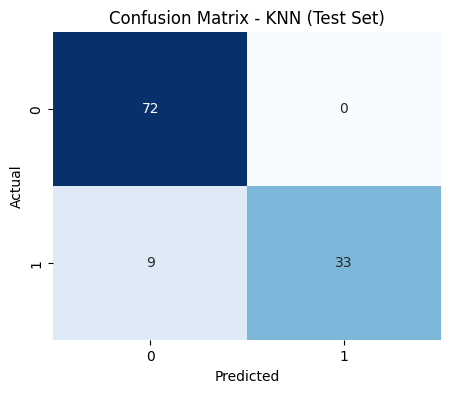

In [36]:
# Compute and display the confusion matrix for the test set using the best KNN model
y_pred_knn = best_knn.predict(X_test_pca4)
cm_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix (KNN, Test Set):\n", cm_knn)

# Optionally, plot the confusion matrix as a heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - KNN (Test Set)')
plt.show()